##in this notebook we all have about feature engineering

Following topics are discussed below:
1. Nominal and ordinal Encoding
2. Label Encoding & Ordinal ENcoding
3. Handling imblanced dataset using SMOTE
4. Handling outliers using py
5. Handling missing values
6. Handling imbalanced Dataset

#First is this topic: Label Encoding & Ordinal ENcoding

In [4]:
#red 0 green 1 blue 01 sort of an example to understand that
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

In [20]:
colors = ['red', 'blue', 'green', 'blue', 'red']
label_encoding = {
    'red':0,
    'blue':1,
    'green':2}

In [22]:
import pandas as pd
df = pd.DataFrame({'color': colors})

# Apply label encoding
df['color_encoded'] = df['color'].map(label_encoding)

print(df)

   color  color_encoded
0    red              0
1   blue              1
2  green              2
3   blue              1
4    red              0


In [24]:
df.head()

,color,color_encoded
0,red,0
1,blue,1
2,green,2
3,blue,1
4,red,0


In [54]:
lbl_encoder.fit_transform(df[['color']])
#2 is for red 1 is for green 0 is for blue

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 0, 2])

In [58]:
lbl_encoder.transform([['red']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [60]:
lbl_encoder.transform([['green']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

In [62]:
lbl_encoder.transform([['blue']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

Label encoding gives numeric values to categories (e.g., red=0, blue=1, green=2).
But machine learning models may think bigger numbers mean more importance or have an order, even when they don’t!

🧠 Example:
If:

red = 0  
blue = 1  
green = 2
The model might wrongly assume:

green > blue > red (like numbers)
Which makes no sense for colors — they’re just different, not ordered.

### Now we have Ordinal encoding, to rank it accordinly, with as such we wnt.

Something like 
School 0 
Clg 1
University 2
with ranking basically

In [91]:
from sklearn.preprocessing import OrdinalEncoder

###create an instance and then transform it as we did before

In [119]:
diffsizes = {
    "size":["small","medium","large","small","medium"]}

In [121]:
import pandas as pd
df = pd.DataFrame(diffsizes)

In [123]:
df.head()

,size
0,small
1,medium
2,large
3,small
4,medium


In [125]:
encoder = OrdinalEncoder(categories=[["small", "medium", "large"]]
)

In [133]:

encoder.fit_transform(df[["size"]])

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.]])

In [135]:
encoder.transform([["small"]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

In [137]:
encoder.transform([["medium"]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[1.]])

In [139]:
encoder.transform([["large"]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[2.]])

### Missing values topic is discussed here
Following types of Missing data/values
1. Missing completely at random --> Imagine a cricket analyst is collecting player stats, and some scorecards are missing because of a power outage at the stadium, and it affected random matches.
2. Missing at random --> Suppose the analyst has full data for home games but notices that player fitness scores are missing more often in away matches (maybe the team doesn’t carry full testing equipment while traveling).
3. Missing data not at random --> Imagine some players don’t report their diet cheat days because they feel guilty or don’t want to get penalized.

In [4]:
import seaborn as snb

In [8]:
df = snb.load_dataset("titanic")

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [41]:
df.shape

(891, 15)

In [39]:
#delete the data points/rows in a dataset
df.dropna().shape
#to make it permanent just write inplace=True to make it permanent

(182, 15)

In [49]:
#column wise
df.dropna(axis=1).shape

(891, 11)

## Imputation Techniques

### Mean value

<Axes: xlabel='age', ylabel='Count'>

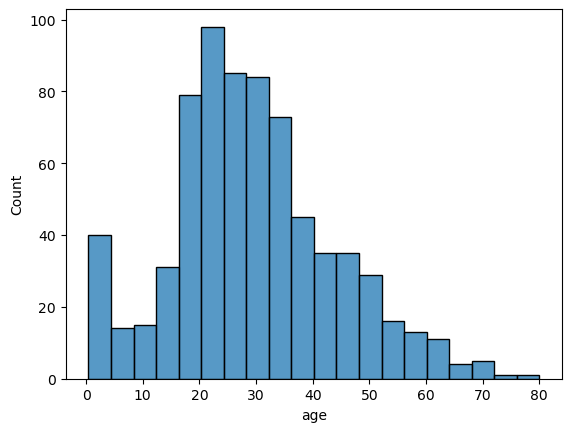

In [53]:
snb.histplot(df['age'])

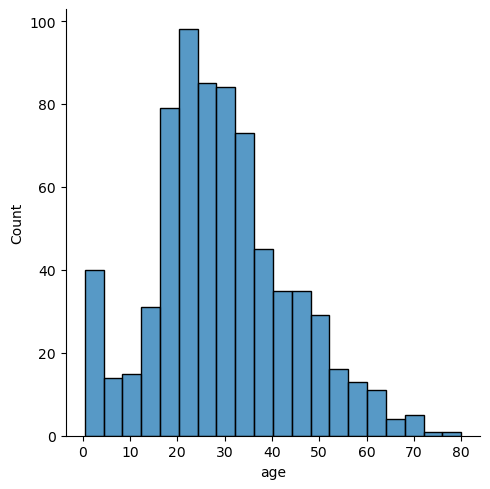

In [55]:
snb.displot(df['age'])

In [65]:
#replacing missing values with the mean 
df['Age mean'] = df['age'].fillna(df['age'].mean())

In [67]:
df[['Age mean', 'age']]

,Age mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


## mean imputation works well with normally distributed data.
there are different types of distribution left skew or right skew

We can replace with median value imputation
why we use that?
It is becoz when we have outliers in the dataset


In [70]:
#lets do median 

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [72]:
df['age median'] = df['age'].fillna(df['age'].median())

In [76]:
df[['age median', 'age']]

,age median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


## 🏏 Handling Imbalanced Dataset – Cricket Example

### Problem:
We're building a model to predict whether a player will score a century in a match.

#### Class Distribution:
- 950 players did **not** score a century (class = 0)
- 50 players **did** score a century (class = 1)

This is a highly **imbalanced dataset**. A model might just predict "no century" for every player and still be 95% accurate — but it wouldn’t be useful!

---

### 🔻 Downsampling Example:
To balance the data, we randomly select only 50 records from the 950 "no century" class.

📊 After downsampling:
- 50 "No Century"
- 50 "Century"

Pros: Fast and simple  
Cons: May lose useful information

---

### 🔺 Upsampling Example:
We randomly duplicate the 50 "century" records until we have 950 of them, matching the larger class.

📊 After upsampling:
- 950 "No Century"
- 950 "Century"

Pros: Keeps all original data  
Cons: Can lead to overfitting

---

### 🏁 Conclusion:
Both methods help train a model that treats both classes fairly and improves predictions for rare but important events — like predicting a century in cricket!


Original class distribution:
century
0    950
1     50
Name: count, dtype: int64


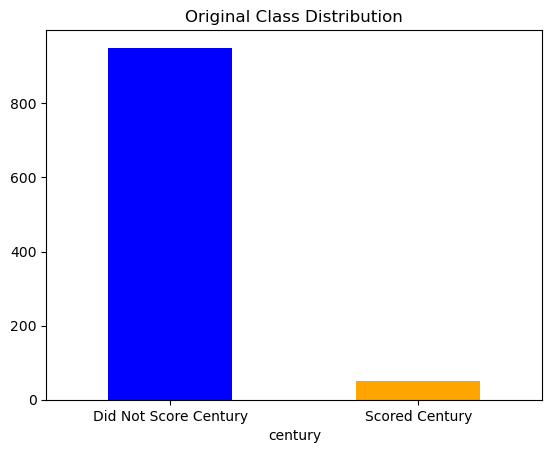


After Downsampling:
century
0    50
1    50
Name: count, dtype: int64


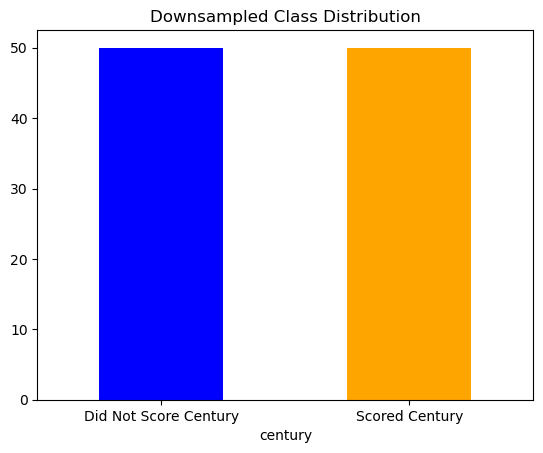


After Upsampling:
century
0    950
1    950
Name: count, dtype: int64


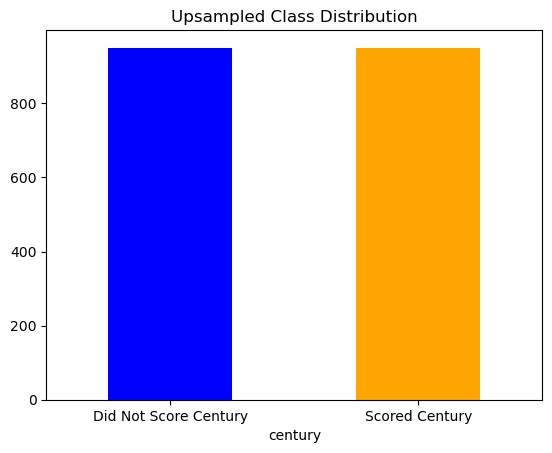

In [79]:
# 📌 Simulating a Cricket Dataset with Imbalanced Classes
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Step 1: Create an example dataset
data = {
    'player_name': ['Player' + str(i) for i in range(1000)],
    'century': [0]*950 + [1]*50  # 950 did not score 100, 50 did
}

df = pd.DataFrame(data)

# Step 2: Check original class distribution
print("Original class distribution:")
print(df['century'].value_counts())

# Optional: Visualize
df['century'].value_counts().plot(kind='bar', title='Original Class Distribution', color=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Did Not Score Century', 'Scored Century'], rotation=0)
plt.show()

# Step 3: Split into majority and minority classes
df_majority = df[df['century'] == 0]
df_minority = df[df['century'] == 1]

# Step 4A: 🔻 Downsampling
df_majority_downsampled = resample(df_majority,
                                   replace=False,     # sample without replacement
                                   n_samples=len(df_minority),  # match minority count
                                   random_state=42)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print("\nAfter Downsampling:")
print(df_downsampled['century'].value_counts())

# Visualize downsampled data
df_downsampled['century'].value_counts().plot(kind='bar', title='Downsampled Class Distribution', color=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Did Not Score Century', 'Scored Century'], rotation=0)
plt.show()

# Step 4B: 🔺 Upsampling
df_minority_upsampled = resample(df_minority,
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority),  # match majority count
                                 random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print("\nAfter Upsampling:")
print(df_upsampled['century'].value_counts())

# Visualize upsampled data
df_upsampled['century'].value_counts().plot(kind='bar', title='Upsampled Class Distribution', color=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Did Not Score Century', 'Scored Century'], rotation=0)
plt.show()
